# Notebook: V2:
### About:
This the `version 2` of the dataloader that I modified. It doesnt use preprocessed annotations .txt files. It is a very simple data loader that I wrote from scratch(some inspiration from the yolov5 dataloader). 

- It doesnt has any caching, augmentation features. 
- It simply uses the template matching for generating the bbox labels.
- I uses the existing dataloader, with slight modifications, metioned in the assigned pdf[crop, random paste]. So, caching, augmentaions are enebled as well.
- The template image used for template matching can be changed via argparse, `--template` flag. 

- The code for this is provided in the `CustomDataset` class at `utils/only_img_cus_dataloaders.py` file.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
import cv2
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
from utils.only_img_cus_dataloaders import create_dataloader
from utils.only_img_cus_dataloaders import CustomDataset

In [2]:
def get_img_cropped(center_x, center_y, width, height, img):         
    x1 = int(center_x - width // 2)
    y1 = int(center_y - height // 2)
    
    x2 = int(x1 + width)
    y2 = int(y1 + height)

    cropped_image = img[y1:y2, x1:x2]
    return cropped_image

### Visualize the Output of the Dataloader in Different Image Sizes:

In [3]:
template_file= "/home/somusan/somusan/soumyadip/interview/lens_assignment/yolov5-custom-dataloader/1_3_crop.tif"
dataset = CustomDataset("../images/train/",img_size=1024,batch_size=2, 
                        template_file=template_file)
custom_data = dataset[3]
print(custom_data)

(tensor([[[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]]], dtype=torch.uint8), tensor([[0.00000, 0.00000, 0.51465, 0.22949, 0.09766, 0.09766],
        [0.00000, 0.0

(487, 205) (587, 305)
(63, 428) (163, 528)


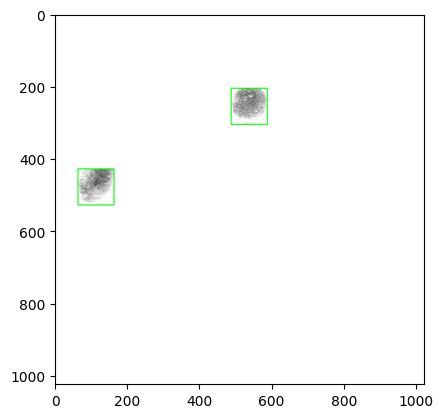

In [5]:
dataset = CustomDataset("../images/train/",
                        img_size=1024,batch_size=2,
                        template_file=template_file)
custom_data = dataset[3]
img_viz = custom_data[0].permute(1,2,0).numpy().astype(np.uint8).copy()
for i in range(custom_data[1].shape[0]):
    center_x, center_y, width, height  = custom_data[1][:,2:][i].numpy()*1024

    x1 = int(center_x - width / 2)
    y1 = int(center_y - height / 2)

    x2 = int(center_x + width / 2)
    y2 = int(center_y + height / 2)

    color = (0, 255, 0)  
    thickness = 2  

    print((x1, y1), (x2, y2))

    cv2.rectangle(img_viz, (x1, y1), (x2, y2), color, thickness)

plt.imshow(img_viz)


(62, 294) (162, 394)
(396, 120) (496, 220)


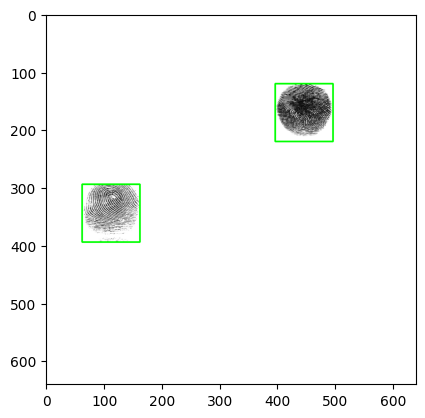

In [6]:
dataset = CustomDataset("../images/train/",
                        img_size=640,batch_size=2,
                        template_file=template_file)
custom_data = dataset[3]
img_viz = custom_data[0].permute(1,2,0).numpy().astype(np.uint8).copy()
for i in range(custom_data[1].shape[0]):
    center_x, center_y, width, height  = custom_data[1][:,2:][i].numpy()*640

    x1 = int(center_x - width / 2)
    y1 = int(center_y - height / 2)

    x2 = int(center_x + width / 2)
    y2 = int(center_y + height / 2)

    color = (0, 255, 0)  
    thickness = 2  

    print((x1, y1), (x2, y2))

    cv2.rectangle(img_viz, (x1, y1), (x2, y2), color, thickness)

plt.imshow(img_viz)


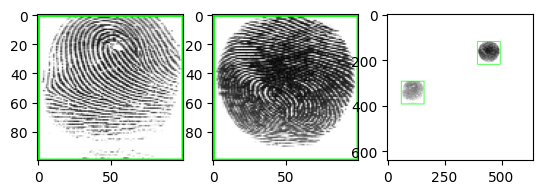

In [7]:
center_x1, center_y1, width1, height1  = custom_data[1][:,2:][0].numpy()*640
center_x2, center_y2, width2, height2  = custom_data[1][:,2:][1].numpy()*640


image1 =get_img_cropped(center_x1, center_y1, width1, height1 , img_viz)
image2 =get_img_cropped(center_x2, center_y2, width2, height2 , img_viz)


plt.subplot(1,3,1)
plt.imshow(image1)

plt.subplot(1,3,2)
plt.imshow(image2)

plt.subplot(1,3,3)
plt.imshow(img_viz)

### Before Training Instruction:
- Before starting the training process, from the `train.py` file use `create_dataloader` from `utils/only_img_cus_dataloaders.py` by importing like this `from utils.only_img_cus_dataloaders import create_dataloader`.

In [8]:
IMG_SIZE = 640
BATCH_SIZE = 2
EPOCHS = 3

In [9]:
!python train.py --img {IMG_SIZE} \
                 --batch {BATCH_SIZE} \
                 --epochs {EPOCHS} \
                 --data ../images/fingerprint_label.yaml \
                 --weights yolov5s.pt \
                 --project simple-custom-dataloader \
                 --template {template_file}

train: weights=yolov5s.pt, cfg=, data=../images/fingerprint_label.yaml, hyp=data/hyps/hyp.scratch-low.yaml, template=/home/somusan/somusan/soumyadip/interview/lens_assignment/yolov5-custom-dataloader/1_3_crop.tif, epochs=3, batch_size=2, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=simple-custom-dataloader, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2023-8-8 Python-3.9.10 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24257MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmu